# 1. 데이터 보기.

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.name

'nt'

In [3]:
# 한글 깨짐 방지
if os.name=="nt":
    plt.rcParams["font.family"]='Malgun Gothic' # 맑은 고딕

In [4]:
df=pd.read_csv("./../data/Lakers.csv")
df.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [5]:
df_copy=df.copy()
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


## 칼럼 설명

* date : 경기 일자
* opponent : 대전 팀
* game_type : 홈 경기 vs 원정 경기
* time : 분, 초
* period : 쿼터 (한 쿼터 당 12분 씩, 동점인 경우 5 쿼터 진행)
* etype : 유형
* team : 팀 구분 (LAL : LA lakers 팀)
* player : 선수 명
* result : 결과
* points : 점수
* type : 세부 행동
* x, y : 상대편 뒤 골대 뒤에서 바라본 (x,y) 좌표이다. 골대의 위치를 표시해준다.

In [6]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
dtype: int64

In [7]:
df_copy.dtypes

date           int64
opponent      object
game_type     object
time          object
period         int64
etype         object
team          object
player        object
result        object
points         int64
type          object
x            float64
y            float64
dtype: object

In [8]:
df_copy.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [9]:
df_copy.describe(include="object")

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [10]:
df_copy.info() # info = dtypes + isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


[tip] 범주형 변수와 연속형 변수를 분리하면 데이터 분석 시에 유용하다.

* 범주형 변수 : opponent, game_type, period, etype, team, player, result, type (빈도 계산 가능)
* 연속형 변수 : date, time, points, x, y (수치 계산 가능)

In [11]:
print("Opponent : ", df_copy["opponent"].unique())
print("Game_Type :", df_copy["game_type"].unique())
print("Period : ", df_copy["period"].unique())
print("Etype : ", df_copy["etype"].unique())
print("Team : ", df_copy["team"].unique())
print("Player : ", df_copy["player"].unique())

Opponent :  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Game_Type : ['home' 'away']
Period :  [1 2 3 4 5]
Etype :  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']
Team :  ['OFF' 'LAL' 'POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN'
 'TOR' 'IND' 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS'
 'UTA' 'GSW' 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
Player :  [nan 'Pau Gasol' 'Vladimir Radmanovic' 'Derek Fisher' 'Greg Oden'
 'LaMarcus Aldridge' 'Kobe Bryant' 'Travis Outlaw' 'Andrew Bynum'
 'Brandon Roy' 'Steve Blake' 'Joel Przybilla' 'Lamar Odom'
 'Rudy Fernandez' 'Trevor Ariza' 'Jordan Farmar' 'Channing Frye'
 'Sergio Rodriguez' 'Sasha Vujacic' 'Jerryd Bayless' 'Nicolas Batum'
 'Luke Walton' 'Ike Diogu' 'Josh Powell' 'Chris Mihm' 'Chris Kaman'
 'Baron Davis' 'Tim Thomas' 'Cuttino Mobley' 'Al

In [12]:
print("Result :", df_copy["result"].unique())
print("Type : ", df_copy["type"].unique())
# game_type, period, result 등으로 묶어서 나타낼 수 있다.

Result : [nan 'missed' 'made']
Type :  [nan 'hook' 'off' 'layup' 'shooting' 'personal' 'jump' 'pullup jump' 'def'
 'driving layup' 'driving finger roll layup' 'regular' 'offensive' '3pt'
 'turnaround jump' 'putback layup' 'slam dunk' 'tip' 'dunk'
 'defensive goaltending' 'hook bank' 'running layup' 'official'
 'driving slam dunk' 'short' 'driving reverse layup' 'kicked ball'
 'putback dunk' 'technical' 'alley oop dunk' 'turnaround fade away'
 'running jump' 'delay of game' 'defense 3 second' 'fade away bank'
 'floating jump' 'driving dunk' 'loose ball' 'running bank' 'running dunk'
 'fade away jumper' 'finger roll layup' 'turnaround hook' 'reverse layup'
 'reverse dunk' 'jump hook' 'jump bank' 'double technical' 'running hook'
 'driving jump' 'turnaround bank' 'step back jump' 'turnaround bank hook'
 'pullup bank' 'alley oop layup' 'putback slam dunk' 'flagrant type 1'
 'running reverse layup' 'running finger roll layup' 'reverse slam dunk'
 'hanging technical' 'running slam dunk' 'dri

In [13]:
print("총 데이터의 개수 : ", df_copy.shape[0]*df_copy.shape[1])
print(f"결측치의 개수 : {df_copy.isnull().sum().sum()}, 전체 데이터의 {((df_copy.isnull().sum().sum())/(df_copy.shape[0]*df_copy.shape[1]))*100:.2f}%를 차지한다.")
print("LAL와 경기한 상대편 팀의 개수 : ", df_copy["opponent"].nunique())
print("LAL의 행동 개수 : ", df_copy["etype"].nunique())
print("LAL의 세부 행동 개수 : ", df_copy["type"].nunique())

총 데이터의 개수 :  450112
결측치의 개수 : 76625, 전체 데이터의 17.02%를 차지한다.
LAL와 경기한 상대편 팀의 개수 :  29
LAL의 행동 개수 :  10
LAL의 세부 행동 개수 :  73


# 2. 데이터를 보고 질문하기.

## 강사님 질문

* LAL의 홈 경기 비율 vs 원정 경기 비율 ?
* 경기에서 선수들이 제일 많이 한 행동 유형(etype)은?
* 이번 시즌에서의 LAL의 경기 결과는?
* LAL 선수들은 코트의 어디 위치에서 어떤 동작을 했는가?

## 나의 질문

* LAL 기준 시간 별 etype 분포 vs OPP 기준 시간 별 etype 분포?
* 경기에서 팀별 제일 많이 한 행동 유형(etype)은?
* period 별 type 비율?

# 3. 데이터 정비하기.

## 3-1. 시간 타입의 데이터 정비하기.

In [14]:
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


In [15]:
df_copy.dtypes

date           int64
opponent      object
game_type     object
time          object
period         int64
etype         object
team          object
player        object
result        object
points         int64
type          object
x            float64
y            float64
dtype: object

In [16]:
df_copy["datetime"]=df_copy["date"].astype("str")+" "+df_copy["time"]
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


In [17]:
df_copy["datetime"]=pd.to_datetime(df_copy["datetime"], format="%Y%m%d %H:%M:%S")
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [18]:
df_copy["date"]=pd.to_datetime(df_copy["date"], format="%Y%m%d")
df_copy.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00


In [19]:
df_copy.dtypes # date와 datetime 모두 datetime으로 변경해주었다.

date         datetime64[ns]
opponent             object
game_type            object
time                 object
period                int64
etype                object
team                 object
player               object
result               object
points                int64
type                 object
x                   float64
y                   float64
datetime     datetime64[ns]
dtype: object

## 3-2. 결측치 처리하기.

In [20]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [21]:
df_copy.isnull().any(axis=0)

date         False
opponent     False
game_type    False
time         False
period       False
etype        False
team         False
player        True
result        True
points       False
type          True
x             True
y             True
datetime     False
dtype: bool

* player, result, type은 고유한 값이기 때문에 따로 NaN 값을 채워줄 필요가 없다.
* x, y는 좌표이기 때문에, 적절한 값을 대입시켜줘야 한다.

**[tip] x,y에 0을 채워 넣기 전에 실제 데이터에 0이 있는지 확인해야한다. 확인하지 않으면, 새로 채운 값이 실제 값을 가릴 수 있기 때문이다.**
<br/> ➡ 확인해 본 결과, x column 에는 0이 있기 때문에, 다른 값을 채워야 한다.

In [22]:
df_copy["x"].unique() # 0이 들어 있다.

array([nan, 23., 25., 36., 30., 34., 15., 46., 21., 39., 20., 26., 17.,
        8., 31., 47., 14., 29.,  1., 38., 41., 44., 43., 37.,  9.,  6.,
       22., 27., 10., 48., 16., 28., 18., 49.,  0., 42., 32.,  7., 13.,
       33., 11., 12.,  2.,  5., 35., 40.,  3., 51., 24., 45., 19.,  4.,
       50.])

In [23]:
df_copy.loc[df_copy["x"]==-1, "x"].index

Int64Index([], dtype='int64')

In [24]:
print(df_copy.loc[df_copy["x"]==-1, "x"].index.tolist()) # x=0인 부분은 존재한다.
print(df_copy.loc[df_copy["y"]==0, "y"].index.tolist()) # y=0인 부분은 없다.
# 나는 결측치에 x에는 -1, y에는 0을 대입시켜주었다.

[]
[]


# 4. EDA & Visualization

## 4-1. LAL의 홈 경기 비율 vs 원정 경기 비율 ?

In [25]:
df_copy[["date", "game_type"]]

,date,game_type
0,2008-10-28,home
1,2008-10-28,home
2,2008-10-28,home
3,2008-10-28,home
4,2008-10-28,home
...,...,...
34619,2009-04-14,home
34620,2009-04-14,home
34621,2009-04-14,home
34622,2009-04-14,home


In [26]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).count()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [27]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum()

,
date,game_type
2008-10-28,home
2008-10-29,away
2008-11-01,away
2008-11-05,home
2008-11-09,home
...,...
2009-04-07,away
2009-04-09,home
2009-04-10,away


In [28]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"])["game_type"].count()

date        game_type
2008-10-28  home         416
2008-10-29  away         455
2008-11-01  away         493
2008-11-05  home         503
2008-11-09  home         425
                        ... 
2009-04-07  away         437
2009-04-09  home         498
2009-04-10  away         466
2009-04-12  home         407
2009-04-14  home         471
Name: game_type, Length: 78, dtype: int64

In [29]:
df_copy["game_type"].value_counts() # 총 경기의 숫자를 의미한다.

home    17471
away    17153
Name: game_type, dtype: int64

In [30]:
df_copy["date"].nunique()

78

In [31]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"])["game_type"].count() # date가 인덱스로 들어가게 된다.

date        game_type
2008-10-28  home         416
2008-10-29  away         455
2008-11-01  away         493
2008-11-05  home         503
2008-11-09  home         425
                        ... 
2009-04-07  away         437
2009-04-09  home         498
2009-04-10  away         466
2009-04-12  home         407
2009-04-14  home         471
Name: game_type, Length: 78, dtype: int64

In [32]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"], as_index=False)["game_type"].count()
# groupby를 이용하면, 기본 인덱스가 그룹 라벨이 된다. 하지만 as_index=False를 처리하면 인덱스를 사용하지 않게 된다.

,date,game_type
0,2008-10-28,416
1,2008-10-29,455
2,2008-11-01,493
3,2008-11-05,503
4,2008-11-09,425
...,...,...
73,2009-04-07,437
74,2009-04-09,498
75,2009-04-10,466
76,2009-04-12,407


In [33]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [34]:
df_copy.groupby(["date", "game_type"]).size().reset_index() # size는 데이터 프레임의 크기를 알 수 있는 메소드이다.
# df_copy를 date, game_type으로 묶어주었고, 그것에 대한 size를 구하였다.

,date,game_type,0
0,2008-10-28,home,416
1,2008-10-29,away,455
2,2008-11-01,away,493
3,2008-11-05,home,503
4,2008-11-09,home,425
...,...,...,...
73,2009-04-07,away,437
74,2009-04-09,home,498
75,2009-04-10,away,466
76,2009-04-12,home,407


In [35]:
df_copy.groupby(["date"])["game_type"].count().reset_index()
# date 별 game_type의 개수를 구한 것이다.

,date,game_type
0,2008-10-28,416
1,2008-10-29,455
2,2008-11-01,493
3,2008-11-05,503
4,2008-11-09,425
...,...,...
73,2009-04-07,437
74,2009-04-09,498
75,2009-04-10,466
76,2009-04-12,407


In [36]:
df_copy.loc[df_copy["date"]=="2008-10-28", ["date", "game_type"]].groupby(["date", "game_type"]).size().reset_index()
# 2008-10-28에 홈 경기만 416개가 이루어 진다. 

,date,game_type,0
0,2008-10-28,home,416


In [37]:
df_copy.loc[df_copy["date"]=="2008-10-28", ["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index().value_counts()

date        game_type
2008-10-28  home         1
dtype: int64

In [38]:
df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()

,date,game_type
0,2008-10-28,home
1,2008-10-29,away
2,2008-11-01,away
3,2008-11-05,home
4,2008-11-09,home
...,...,...
73,2009-04-07,away
74,2009-04-09,home
75,2009-04-10,away
76,2009-04-12,home


In [39]:
df_sum=df_copy[["date", "game_type"]].groupby(["date", "game_type"]).sum().reset_index()
df_sum['game_type'].value_counts() # 2번 작업해줘야 한다.
# 날짜 별 경기 종류의 횟수를 의미한다.

home    39
away    39
Name: game_type, dtype: int64

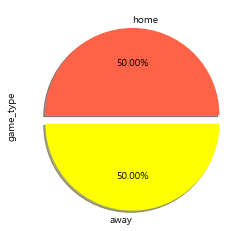

In [40]:
_=df_sum['game_type'].value_counts().plot.pie(colors=["tomato", "yellow"], shadow=True, explode=[0, 0.1], autopct="%.2f%%")
_=plt.savefig("./../images_Lakers/practice.png")

In [41]:
df_drop=df_copy.drop_duplicates(subset=["date"], keep="first") # 앞에 있는 것을 살린다.
df_drop # 중복되는 것들이 사라진다.

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,2008-10-28,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-28 12:00:00
416,2008-10-29,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-10-29 12:00:00
871,2008-11-01,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-01 12:00:00
1364,2008-11-05,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-05 12:00:00
1867,2008-11-09,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2008-11-09 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,2009-04-07,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-07 12:00:00
32782,2009-04-09,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-09 12:00:00
33280,2009-04-10,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-10 12:00:00
33746,2009-04-12,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,2009-04-12 12:00:00


In [42]:
df_drop["game_type"].value_counts()

home    39
away    39
Name: game_type, dtype: int64

In [43]:
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지

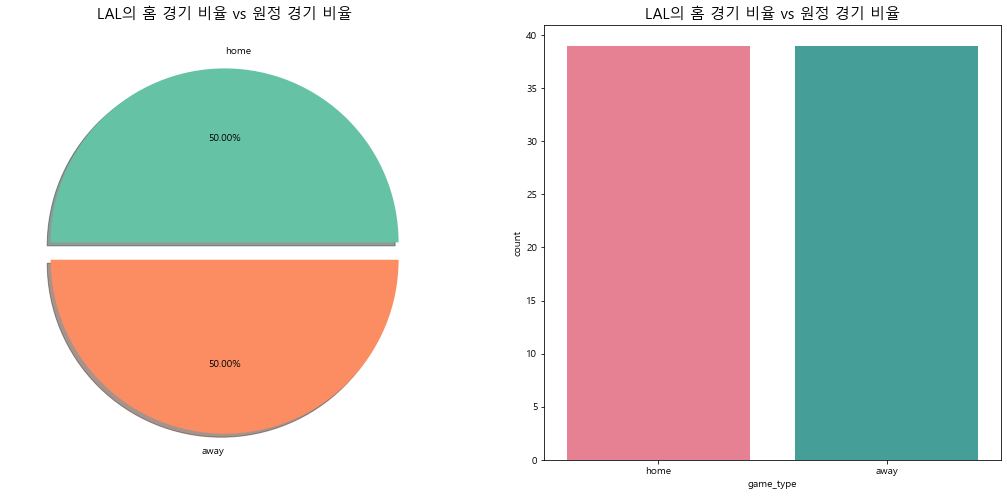

In [44]:
fig,ax=plt.subplots(1, 2, figsize=(18,8))
color_list=sns.color_palette("Set2", df_copy["game_type"].nunique())

_=df_drop["game_type"].value_counts().plot.pie(ax=ax[0], autopct="%.2f%%", explode=[0, 0.1], shadow=True, colors=color_list)
_=ax[0].set_title("LAL의 홈 경기 비율 vs 원정 경기 비율", size=15)
_=ax[0].set_ylabel("")

_=sns.countplot(data=df_drop, x="game_type", ax=ax[1], palette="husl")
_=ax[1].set_title("LAL의 홈 경기 비율 vs 원정 경기 비율", size=15)

fig.savefig("./../images_Lakers/LAL의 홈 경기 비율 vs 원정 경기 비율.png", dpi=200, facecolor="#F6F7FB")

### ∴ 홈 경기와 원정 경기의 비율은 50%로 각각 동일하다.

## 4-2. 경기에서 선수들이 제일 많이 한 행동 유형(etype)은?

> 단순하게 표기하고 싶으면 countplot을 이용하면 된다.
<br/>만약에 period 별로 etype의 개수를 세고 싶으면 ➡ period, etype groupby 실행하기 ➡ reset_index와 as_index=False 이용하기. ➡ pivot table로 변경하기. ➡ Stacked Bar Graph 그리기.

In [45]:
print("Etype : ", df_copy["etype"].unique())

Etype :  ['jump ball' 'shot' 'rebound' 'foul' 'free throw' 'turnover' 'timeout'
 'sub' 'violation' 'ejection']


In [46]:
df_copy["etype"].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

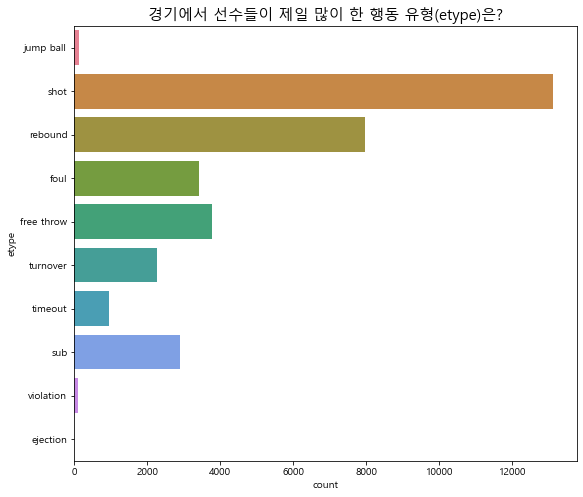

In [47]:
fig, ax=plt.subplots(1, 1, figsize=(9,8))

_=sns.countplot(data=df_copy, y="etype", palette="husl")
_=ax.set_title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", size=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype).png", dpi=200, facecolor="#F6F7FB")

### ∴ shot이 가장 많고, jump ball과 violation이 가장 적은 편이다.

In [48]:
df_copy.groupby(["etype", "period"]).size().reset_index() # 위와 아래는 같은 코드이다.

,etype,period,0
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [49]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [50]:
df_copy.groupby(["etype", "period"])["team"].count().reset_index()

,etype,period,team
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [51]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [52]:
df_copy.groupby(["etype", "period"], as_index=False)["team"].count()

,etype,period,team
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [53]:
df2=df_copy.groupby(["etype", "period"], as_index=False)["team"].count() # reset_index와 동일한 역할을 수행한다.
df2.columns=['etype', 'period', 'total_count']
df2

,etype,period,total_count
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [54]:
df2=df_copy.groupby(["etype", "period"]).size().reset_index() # 위와 아래는 같은 코드이다.
df2.columns=["etype", "period", "total_count"]
df2

,etype,period,total_count
0,ejection,3,1
1,foul,1,665
2,foul,2,887
3,foul,3,848
4,foul,4,1002
5,foul,5,15
6,free throw,1,666
7,free throw,2,944
8,free throw,3,949
9,free throw,4,1205


In [55]:
df_huePer=pd.pivot_table(df2, index="etype", columns="period", values="total_count")
df_huePer
# 동점인 경우만 5 quarter를 진행하기 때문에, 다른 period의 값 보다는 훨씬 작은 편에 속한다.

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


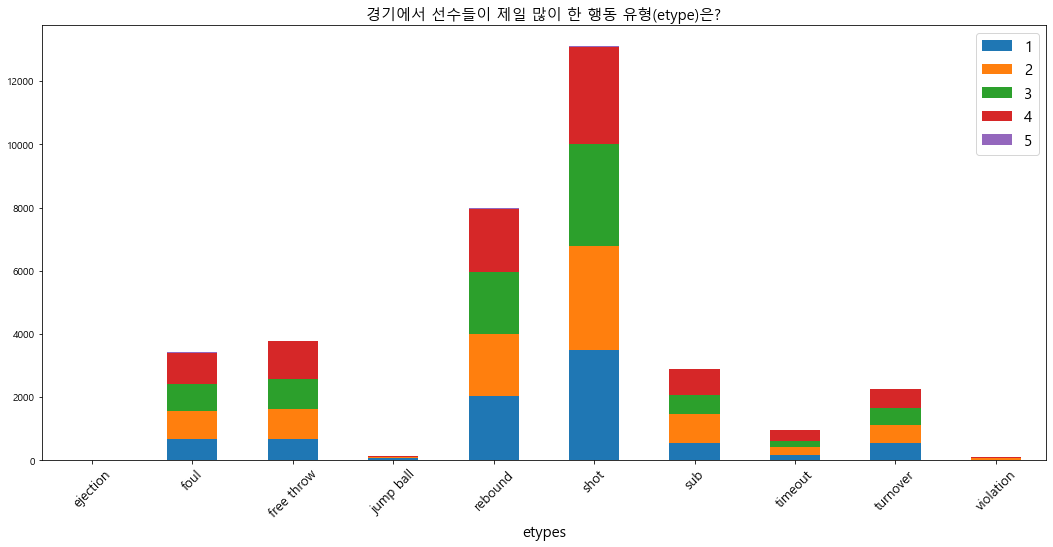

In [56]:
_=df_huePer.plot.bar(stacked=True, figsize=(18,8)) # index : x, columns : stacked
_=plt.legend(fontsize=15)
_=plt.xticks(fontsize=13, rotation=45)
_=plt.xlabel("etypes", fontsize=15)
_=plt.title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", fontsize=15)

plt.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_bar.png", dpi=200, facecolor="#F6F7FB")
# stacked 처리한 것이 훨씬 보기 편리하다.
# period 마다 크게 차이는 없다.

### ∴ period 별 etypes의 비율은 크게 변동 없다. period와 etypes는 크게 관계가 없는 편이다.

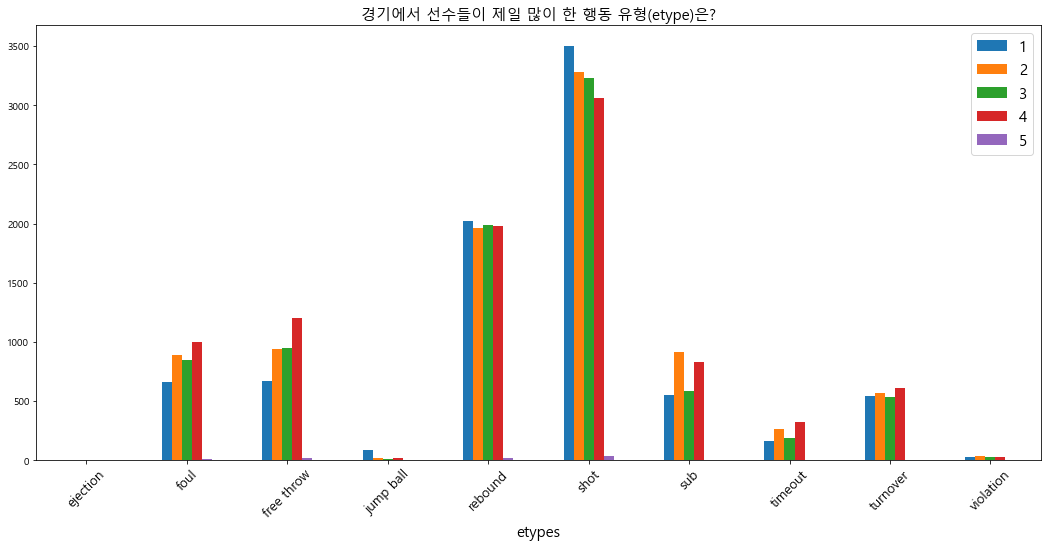

In [57]:
_=df_huePer.plot.bar(figsize=(18,8)) # index : x, columns : hue
_=plt.legend(fontsize=15)
_=plt.xticks(fontsize=13, rotation=45)
_=plt.xlabel("etypes", fontsize=15)
_=plt.title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", fontsize=15)

plt.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_bar_hue.png", dpi=200, facecolor="#F6F7FB")

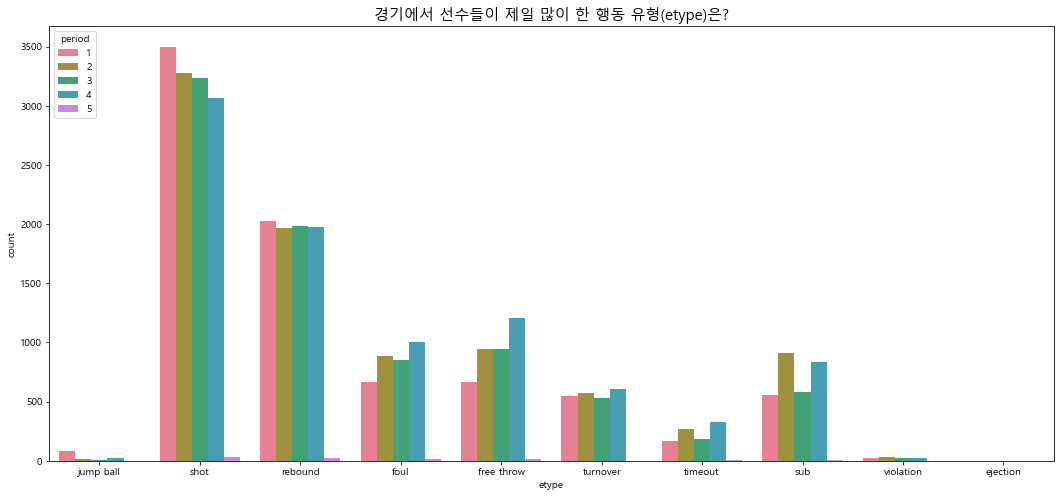

In [58]:
fig, ax=plt.subplots(1, 1, figsize=(18,8))

_=sns.countplot(data=df_copy, x="etype", palette="husl", hue="period")
_=ax.set_title("경기에서 선수들이 제일 많이 한 행동 유형(etype)은?", size=15)

fig.savefig("./../images_Lakers/경기에서 선수들이 제일 많이 한 행동 유형(etype)_sns.png", dpi=200, facecolor="#F6F7FB")

## 4-3. 이번 시즌에서의 LAL의 경기 결과는? 

* 시계열을 통해서 경기 결과를 표현하기. 
* 시간 순으로 나타낸 그래프를 의미한다. 시간이 있으면 시계열 그래프를 그려보는 것이 도움이 된다.

In [59]:
df_copy.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
datetime         0
dtype: int64

In [60]:
df_copy["time"].value_counts()

0:00     357
0:01     140
0:03     108
0:02     101
0:04      86
        ... 
11:51     16
11:53      3
11:52      3
11:56      2
11:57      1
Name: time, Length: 717, dtype: int64

In [61]:
df_copy["result"].unique()

array([nan, 'missed', 'made'], dtype=object)

In [62]:
score=df_copy["result"].isin(["made"]) # isin 사용 시에 대괄호 잊지 않기.
score # index를 이용해서 원하는 행들을 추출할 수 있다. (득점에 성공한 행만 알고 싶다.)

0        False
1        False
2        False
3        False
4        False
         ...  
34619     True
34620     True
34621    False
34622    False
34623    False
Name: result, Length: 34624, dtype: bool

In [63]:
df_copy.loc[score,:].head() # 득점을 성공한 경우를 의미한다.

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,NaN,NaN,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00


In [64]:
df_success=df_copy.loc[score, ["date", "team", "points"]].groupby(["date", "team"]).sum()
df_success # 득점에 성공한 경우만 모아서 포인트의 합계를 구하는 집계 함수를 이용하기.

points
date       team        
2008-10-28 LAL       96
           POR       76
2008-10-29 LAC       79
           LAL      117
2008-11-01 DEN       97
...                 ...
2009-04-10 POR      106
2009-04-12 LAL       92
           MEM       75
2009-04-14 LAL      125
           UTA      112

[156 rows x 1 columns]

In [65]:
df_success=df_success.reset_index()
df_success

,date,team,points
0,2008-10-28,LAL,96
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
3,2008-10-29,LAL,117
4,2008-11-01,DEN,97
...,...,...,...
151,2009-04-10,POR,106
152,2009-04-12,LAL,92
153,2009-04-12,MEM,75
154,2009-04-14,LAL,125


In [66]:
# LAL vs 상대편으로 결과 나눠보기.
df_LAL=df_success.loc[df_success["team"]=="LAL"]
df_NotLAL=df_success.loc[df_success["team"]!="LAL"]

In [67]:
df_LAL # LAL 팀

,date,team,points
0,2008-10-28,LAL,96
3,2008-10-29,LAL,117
5,2008-11-01,LAL,104
7,2008-11-05,LAL,106
9,2008-11-09,LAL,111
...,...,...,...
146,2009-04-07,LAL,122
149,2009-04-09,LAL,116
150,2009-04-10,LAL,98
152,2009-04-12,LAL,92


In [68]:
df_NotLAL # 상대 팀

,date,team,points
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
4,2008-11-01,DEN,97
6,2008-11-05,LAC,88
8,2008-11-09,HOU,82
...,...,...,...
147,2009-04-07,SAC,104
148,2009-04-09,DEN,102
151,2009-04-10,POR,106
153,2009-04-12,MEM,75


In [69]:
df_merge=pd.merge(df_LAL, df_NotLAL, on="date") # 붙이는 key를 date라고 지정한다. 그리고 두 개의 df를 합쳐준다.
df_merge.columns=["date", "LAL", "points_LAL", "NotLAL", "points_NotLAL"]
df_merge

,date,LAL,points_LAL,NotLAL,points_NotLAL
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
75,2009-04-10,LAL,98,POR,106
76,2009-04-12,LAL,92,MEM,75


In [70]:
# LAL의 승리 df와 패배 df를 구분하자.
win=df_merge.loc[df_merge.loc[:, "points_LAL"]>df_merge.loc[:, "points_NotLAL"]] # 승리 df
loss=df_merge.loc[df_merge.loc[:, "points_LAL"]<df_merge.loc[:, "points_NotLAL"]] # 패배 df

In [71]:
df_merge.shape[0]

78

In [72]:
win

,date,LAL,points_LAL,NotLAL,points_NotLAL
0,2008-10-28,LAL,96,POR,76
1,2008-10-29,LAL,117,LAC,79
2,2008-11-01,LAL,104,DEN,97
3,2008-11-05,LAL,106,LAC,88
4,2008-11-09,LAL,111,HOU,82
...,...,...,...,...,...
72,2009-04-05,LAL,88,LAC,85
73,2009-04-07,LAL,122,SAC,104
74,2009-04-09,LAL,116,DEN,102
76,2009-04-12,LAL,92,MEM,75


In [73]:
df_merge.loc[win.index, :].shape[0] # 총 63번 우승하였습니다.

63

In [74]:
# LAL가 이긴 날과 진 날을 구분하자.
win=df_merge.loc[df_merge["points_LAL"]>df_merge["points_NotLAL"], :] # 승리한 index
lose=df_merge[df_merge["points_LAL"]<df_merge["points_NotLAL"]] # 패배한 index

print(f"LA Lakers는 전체 경기 {df_merge.shape[0]}회 중에서 {df_merge.loc[win.index, :].shape[0]}번 우승하였다.")
print(f"LA LAkers가 약 {(df_merge.loc[win.index, :].shape[0]/df_merge.shape[0])*100:.2f} % 정도의 확률로 승리하였습니다.")

LA Lakers는 전체 경기 78회 중에서 63번 우승하였다.
LA LAkers가 약 80.77 % 정도의 확률로 승리하였습니다.


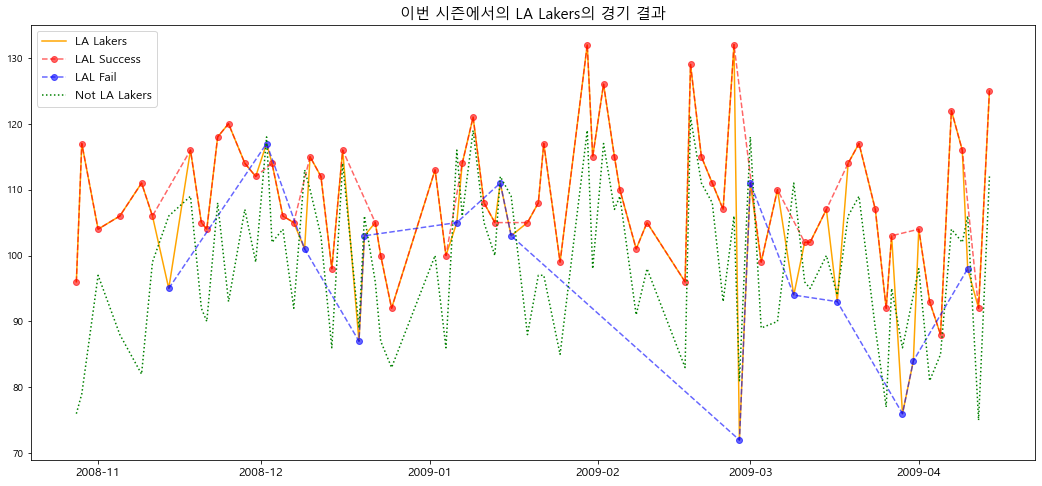

In [75]:
fig, ax=plt.subplots(1, 1, figsize=(18,8))
_=ax.set_title("이번 시즌에서의 LA Lakers의 경기 결과", size=15)

# LAL 시간에 따른 경기 결과 점수를 시계열 그래프로 보여주기.
_=plt.plot(df_LAL["date"], df_LAL["points"], alpha=1, color="orange", label="LA Lakers")

# LAL가 이긴 날은 빨간색, LAL가 진 날은 파란색으로 표기하기.
_=plt.plot(win["date"], win["points_LAL"], color="red", label="LAL Success", marker="o", linestyle="--", alpha=0.6)
_=plt.plot(loss["date"], loss["points_LAL"], color="blue", label="LAL Fail", marker="o", linestyle="--", alpha=0.6)

# 상대팀 점수를 초록색 점선으로 나타내기.
_=plt.plot(df_NotLAL["date"], df_NotLAL["points"], alpha=1, color="green", linestyle=":", label="Not LA Lakers")

_=plt.legend(fontsize=12, loc="upper left")
_=plt.xticks(fontsize=12)

fig.savefig("./../images_Lakers/이번 시즌 LAL 시계열 그래프.png", dpi=200, facecolor="#F6F7FB")

### ∴ 시계열을 통해서 LAL가 언제 이기고, 졌는지를 알 수 있는 그래프이다. 또한, 승리한 횟수가 패배한 횟수보다 훨씬 많다.

[tip] 그래프가 복잡해보이더라도, LA Lakers가 언제 이기고 졌는지 확실하게 알 수 있는 그래프이다.

## 4-4. LAL 선수들은 코트의 어디 위치에서 어떤 동작을 했는가?

In [76]:
# 이번에는 LA Lakers 팀만 볼 것이다.
lal=df_copy.loc[df_copy["team"]=="LAL"]
lal

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,NaN,NaN,2009-04-14 00:54:00
34617,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,NaN,NaN,2009-04-14 00:54:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,NaN,NaN,2009-04-14 00:42:00
34621,2009-04-14,UTA,home,0:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,NaN,NaN,2009-04-14 00:27:00


In [77]:
plt.rcParams['axes.unicode_minus'] = False # matplotlib minus missing.

In [78]:
# 전체적으로 오류 표기 안 하는 방법
import warnings
warnings.filterwarnings("ignore")
# 이를 설정해주면, warn_singular=false를 지정하지 않아도 된다.

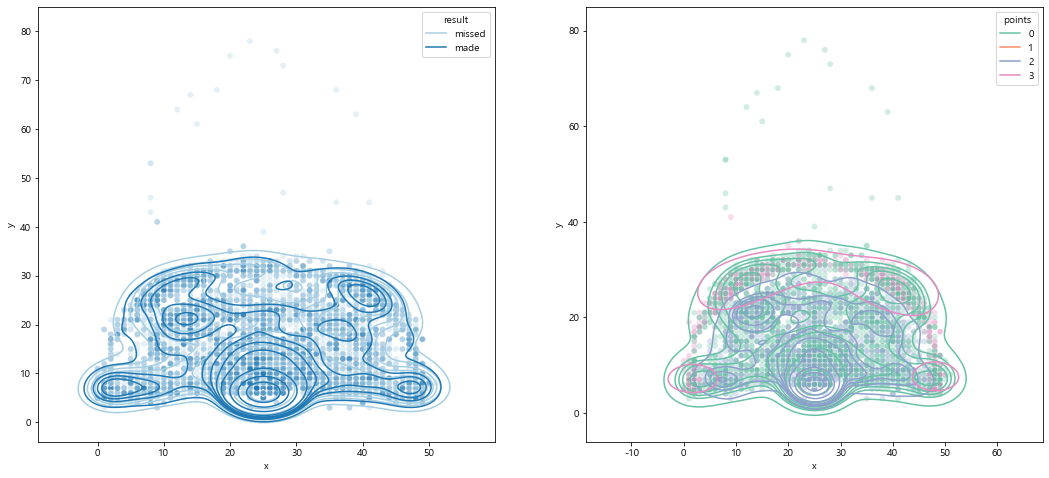

In [79]:
fig, ax=plt.subplots(1, 2, figsize=(18,8))

# 득점 성공 / 실패 분포 : 선수의 위치에서 득점에 성공했는지 실패했는지 분포를 알 수 있다.
_=sns.scatterplot(data=lal, x="x", y="y", hue="result", alpha=0.3, ax=ax[0], palette="Paired")
_=sns.kdeplot(data=lal, x="x", y="y", hue="result", ax=ax[0], palette="Paired")

# 득점 점수 별 분포 : 선수의 위치에서 몇 점을 얻어갔는지 분포를 알 수 있다.
_=sns.scatterplot(data=lal, x="x", y="y", hue="points", alpha=0.3, ax=ax[1], palette="Set2")
_=sns.kdeplot(data=lal, x="x", y="y", hue="points", ax=ax[1], palette="Set2")

### ∴ 골대 근처로 슛이 많이 들어가기 때문에, 그 쪽에 분포가 많이 쏠려있다. 그리고 득점이 큰 경우는 골대에서 멀리 득점을 획득한 경우가 많았다.

In [80]:
lal["type"] # LA Lakers 팀의 type을 의미한다.

1            hook
2             off
3           layup
4             off
5            hook
           ...   
34616         NaN
34617         NaN
34618    personal
34621         NaN
34623         def
Name: type, Length: 17235, dtype: object

In [81]:
lal["type"].value_counts().head(10).index # 상위 10개의 인덱스만 가져오기.

Index(['def', 'jump', '3pt', 'layup', 'off', 'shooting', 'personal', 'regular',
       'driving layup', 'hook'],
      dtype='object')

In [82]:
lal["type"].value_counts().head(10)

def              2464
jump             2114
3pt              1434
layup            1017
off               962
shooting          758
personal          635
regular           311
driving layup     307
hook              174
Name: type, dtype: int64

In [83]:
# 가장 많이 한 세부 행동 10개 고르기.
lal_10=lal.loc[lal["type"].isin(lal["type"].value_counts().head(10).index), :]
lal_10 # 세부 행동이 너무 많기 때문에, 10개만 그려보기.

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,2008-10-28,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,2008-10-28 11:39:00
2,2008-10-28,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,2008-10-28 11:37:00
3,2008-10-28,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,2008-10-28 11:25:00
4,2008-10-28,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,2008-10-28 11:23:00
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,2009-04-14,UTA,home,2:12,4,shot,LAL,Jordan Farmar,missed,0,jump,40.0,7.0,2009-04-14 02:12:00
34605,2009-04-14,UTA,home,2:06,4,foul,LAL,Jordan Farmar,NaN,0,shooting,NaN,NaN,2009-04-14 02:06:00
34611,2009-04-14,UTA,home,1:27,4,rebound,LAL,Josh Powell,NaN,0,def,NaN,NaN,2009-04-14 01:27:00
34618,2009-04-14,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,NaN,NaN,2009-04-14 00:42:00


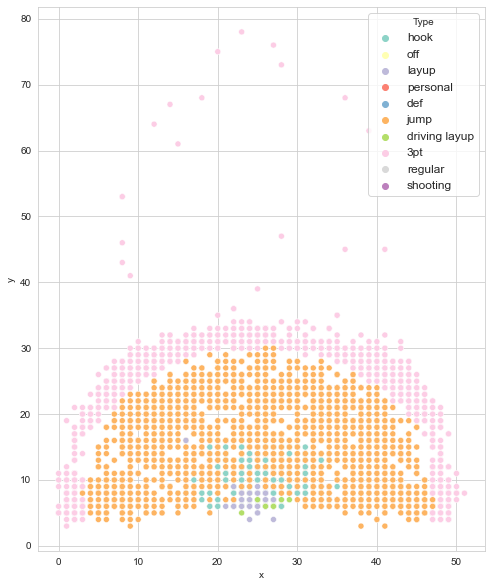

In [84]:
sns.set_style("whitegrid")
fig, ax=plt.subplots(1, 1, figsize=(8,10))

_=sns.scatterplot(data=lal_10, x="x", y="y", hue="type", alpha=1, palette="Set3")
_=plt.legend(fontsize=12, title="Type")

plt.savefig("./../images_Lakers/type 상위 10개 산점도.png", dpi=200, facecolor="#F6F7FB")

### ∴ type의 상위 10개의 분포를 알아보았다. def가 가장 많았고, 그 다음으로는 jump가 많았다. 골대 근처에서 hook, layup, driving layup이 많았고, 골대에서 멀리 떨어진 곳에서는 3pt와 jump가 많았다. 즉, 사용하는 기술은 거리와 관계가 있어 보인다.

## 4-5. LAL 기준 날짜 별 etype 분포 vs OPP 기준 날짜 별 etype 분포?

In [85]:
df_copy["etype"].unique() # 10

array(['jump ball', 'shot', 'rebound', 'foul', 'free throw', 'turnover',
       'timeout', 'sub', 'violation', 'ejection'], dtype=object)

In [86]:
df_made=df_copy.loc[df_copy["result"]=="made", :] # 득점에 성공한 경우만 가져오기.
df_made

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,2008-10-28,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,2008-10-28 11:22:00
7,2008-10-28,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,NaN,NaN,2008-10-28 11:22:00
9,2008-10-28,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,2008-10-28 10:53:00
10,2008-10-28,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,2008-10-28 10:45:00
13,2008-10-28,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,2008-10-28 10:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34609,2009-04-14,UTA,home,1:52,4,shot,LAL,Andrew Bynum,made,2,dunk,25.0,6.0,2009-04-14 01:52:00
34616,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,NaN,NaN,2009-04-14 00:54:00
34617,2009-04-14,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,NaN,NaN,2009-04-14 00:54:00
34619,2009-04-14,UTA,home,0:42,4,free throw,UTA,Kyle Korver,made,1,NaN,NaN,NaN,2009-04-14 00:42:00


In [87]:
df_made=df_made[["date", "team", "points", "etype"]]
df_made

,date,team,points,etype
5,2008-10-28,LAL,2,shot
7,2008-10-28,LAL,1,free throw
9,2008-10-28,POR,2,shot
10,2008-10-28,LAL,2,shot
13,2008-10-28,LAL,2,shot
...,...,...,...,...
34609,2009-04-14,LAL,2,shot
34616,2009-04-14,LAL,1,free throw
34617,2009-04-14,LAL,1,free throw
34619,2009-04-14,UTA,1,free throw


In [88]:
lal=df_made.loc[df_made["team"]=="LAL"]
opp=df_made.loc[df_made["team"]!="LAL"]

In [89]:
lal

,date,team,points,etype
5,2008-10-28,LAL,2,shot
7,2008-10-28,LAL,1,free throw
10,2008-10-28,LAL,2,shot
13,2008-10-28,LAL,2,shot
17,2008-10-28,LAL,2,shot
...,...,...,...,...
34578,2009-04-14,LAL,2,shot
34585,2009-04-14,LAL,2,shot
34609,2009-04-14,LAL,2,shot
34616,2009-04-14,LAL,1,free throw


In [90]:
opp

,date,team,points,etype
9,2008-10-28,POR,2,shot
14,2008-10-28,POR,2,shot
63,2008-10-28,POR,2,shot
85,2008-10-28,POR,2,shot
91,2008-10-28,POR,2,shot
...,...,...,...,...
34592,2009-04-14,UTA,3,shot
34601,2009-04-14,UTA,2,shot
34608,2009-04-14,UTA,1,free throw
34619,2009-04-14,UTA,1,free throw


In [91]:
lal.loc[lal["date"]=="2008-10-28", ["date" ,"etype"]]

,date,etype
5,2008-10-28,shot
7,2008-10-28,free throw
10,2008-10-28,shot
13,2008-10-28,shot
17,2008-10-28,shot
33,2008-10-28,shot
40,2008-10-28,shot
57,2008-10-28,shot
65,2008-10-28,shot
90,2008-10-28,shot


In [92]:
newdf=lal.loc[lal["date"]=="2008-10-28", ["date" ,"etype"]].groupby(["date", "etype"]).size().reset_index()
newdf.columns=["date", "etype", "total_count"]
newdf

,date,etype,total_count
0,2008-10-28,free throw,15
1,2008-10-28,shot,37


In [93]:
lal[["date" ,"etype"]].groupby(["date", "etype"]).sum().reset_index()

,date,etype
0,2008-10-28,free throw
1,2008-10-28,shot
2,2008-10-29,free throw
3,2008-10-29,shot
4,2008-11-01,free throw
...,...,...
151,2009-04-10,shot
152,2009-04-12,free throw
153,2009-04-12,shot
154,2009-04-14,free throw


In [94]:
lal_drop=lal[["date" ,"etype"]].groupby(["date", "etype"]).size().reset_index()
lal_drop.columns=["date", "etype", "total_count"]
lal_drop

,date,etype,total_count
0,2008-10-28,free throw,15
1,2008-10-28,shot,37
2,2008-10-29,free throw,25
3,2008-10-29,shot,41
4,2008-11-01,free throw,32
...,...,...,...
151,2009-04-10,shot,38
152,2009-04-12,free throw,13
153,2009-04-12,shot,38
154,2009-04-14,free throw,21


In [95]:
opp_drop=opp[["date" ,"etype"]].groupby(["date", "etype"]).size().reset_index()
opp_drop.columns=["date", "etype", "total_count"]
opp_drop

,date,etype,total_count
0,2008-10-28,free throw,8
1,2008-10-28,shot,29
2,2008-10-29,free throw,14
3,2008-10-29,shot,30
4,2008-11-01,free throw,21
...,...,...,...
151,2009-04-10,shot,35
152,2009-04-12,free throw,15
153,2009-04-12,shot,26
154,2009-04-14,free throw,35


In [96]:
lal_maxEtype=lal_drop.sort_values(by="total_count", ascending=False)[["date", "etype"]].iloc[0] # LA Lakers가 가장 많이 사용한 기술과 날짜
lal_maxEtype

date     2009-02-26 00:00:00
etype                   shot
Name: 107, dtype: object

In [97]:
opp_maxEtype=opp_drop.sort_values(by="total_count", ascending=False)[["date", "etype"]].iloc[0] # OPP가 가장 많이 사용한 기술과 날짜
opp_maxEtype

date     2009-02-18 00:00:00
etype                   shot
Name: 99, dtype: object

In [98]:
str(lal_maxEtype["date"]).split()[0]

'2009-02-26'

In [99]:
print("LAL 팀이 가장 많이 이용한 기술은", lal_maxEtype["etype"], "이고 그 날짜는", str(lal_maxEtype["date"]).split()[0], "이다.")
print("OPP 팀이 가장 많이 이용한 기술은", opp_maxEtype["etype"], "이고 그 날짜는", str(opp_maxEtype["date"]).split()[0], "이다.")

LAL 팀이 가장 많이 이용한 기술은 shot 이고 그 날짜는 2009-02-26 이다.
OPP 팀이 가장 많이 이용한 기술은 shot 이고 그 날짜는 2009-02-18 이다.


In [100]:
plt.rcParams["font.family"]="Malgun Gothic"

In [101]:
lal_drop["etype"].unique()

array(['free throw', 'shot'], dtype=object)

In [102]:
opp_drop["etype"].unique()

array(['free throw', 'shot'], dtype=object)

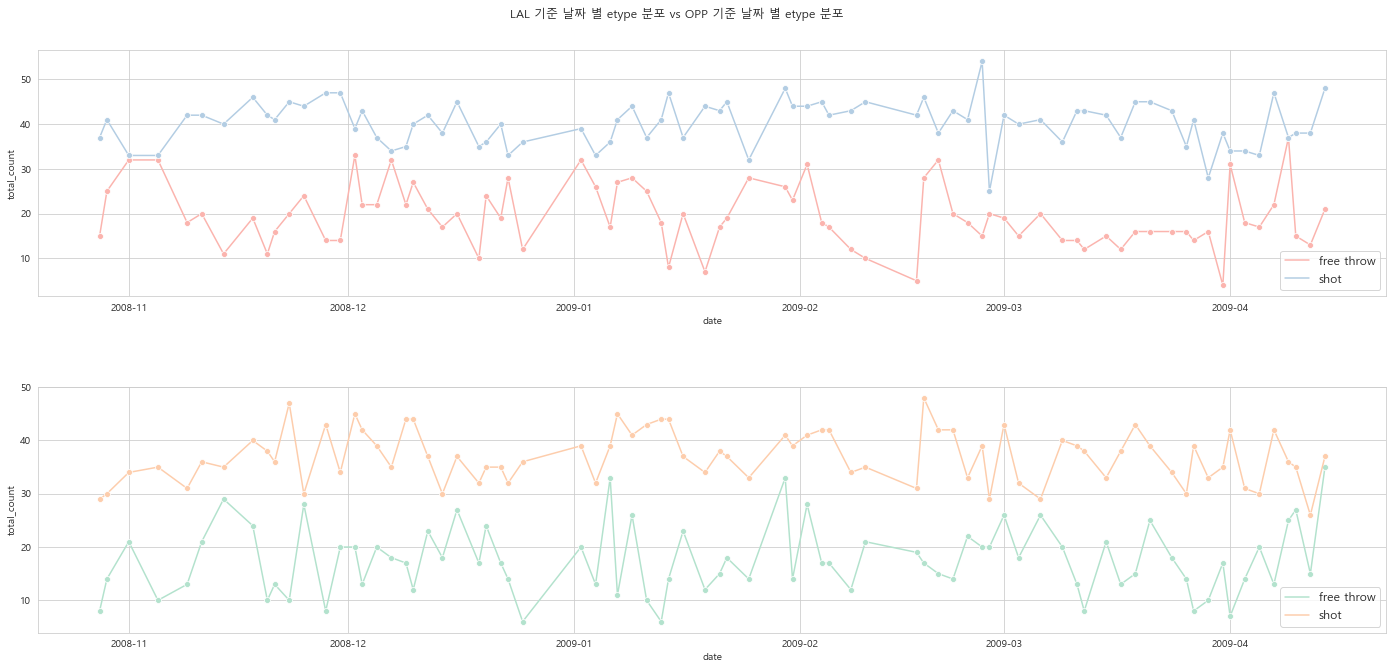

In [103]:
fig, ax=plt.subplots(2, 1, figsize=(20,10))
_=plt.suptitle("LAL 기준 날짜 별 etype 분포 vs OPP 기준 날짜 별 etype 분포")

_=sns.lineplot(data=lal_drop, x="date", y="total_count", ax=ax[0], hue="etype", marker="o", palette="Pastel1")
_=ax[0].legend(loc="lower right", fontsize=12)
_=sns.lineplot(data=opp_drop, x="date", y="total_count", ax=ax[1], hue="etype", marker="o", palette="Pastel2")
_=ax[1].legend(loc="lower right", fontsize=12)

fig.savefig("./../images_Lakers/etype 날짜 별 전체 포인트.png", dpi=200, facecolor="#F6F7FB")
fig.tight_layout()

### ∴ 모든 팀 (LA Lakers와 LAL가 아닌 팀)이 가장 많이 이용한 기술은 shot 이다. 날짜 별로 비교했을 때, 항상 shot가 free throw 보다 많았다. LAL 팀은 2009-02-26에 가장 많이 shot를 이용하고, OPP 팀은 2009-02-18에 가장 많이 shot를 이용하였다.

## 4-6. 경기에서 팀별 제일 많이 한 행동 유형(etype)은?

In [104]:
df_copy["team"].unique()

array(['OFF', 'LAL', 'POR', 'LAC', 'DEN', 'HOU', 'DAL', 'DET', 'CHI',
       'PHX', 'SAC', 'NJN', 'TOR', 'IND', 'PHI', 'WAS', 'MIL', 'MIN',
       'NYK', 'MIA', 'ORL', 'MEM', 'NOH', 'BOS', 'UTA', 'GSW', 'SAS',
       'CLE', 'OKC', 'ATL', 'CHA'], dtype=object)

In [105]:
df_max=df_copy.groupby(["team", "type"]).size().reset_index().sort_values(by=0, ascending=False).head(10)
df_max.columns=["team", "type", "total_max"]
df_max # 세부 기술이 많은 순으로 보았을 때, 상위 10개 모두 LAL 팀이었다.

,team,type,total_max
417,LAL,def,2464
443,LAL,jump,2114
412,LAL,3pt,1434
450,LAL,layup,1017
452,LAL,off,962
472,LAL,shooting,758
454,LAL,personal,635
460,LAL,regular,311
429,LAL,driving layup,307
482,LAL,turnaround jump,174


In [106]:
order=df_max.sort_values(by="total_max", ascending=False)["type"].values.tolist()
order

['def',
 'jump',
 '3pt',
 'layup',
 'off',
 'shooting',
 'personal',
 'regular',
 'driving layup',
 'turnaround jump']

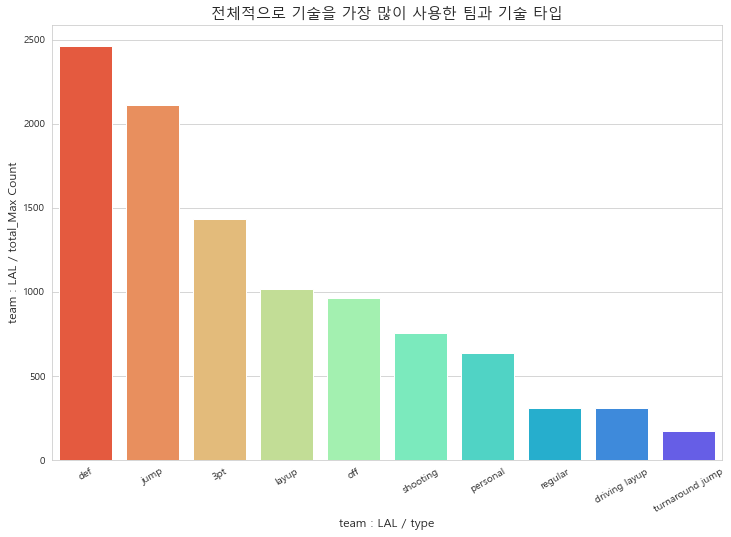

In [107]:
fig, ax=plt.subplots(1, 1, figsize=(12,8))
_=sns.barplot(data=df_max, x="type", y="total_max", order=order, palette="rainbow_r") # 가장 많은 것부터 작은 순으로 그래프 그림.
_=ax.set_title("전체적으로 기술을 가장 많이 사용한 팀과 기술 타입", fontsize=15)
_=plt.xlabel("team : LAL / type", fontsize=12)
_=plt.xticks(rotation=30)
_=ax.set_ylabel("team : LAL / total_Max Count", fontsize=12)

fig.savefig("./../images_Lakers/total max type head 10.png", dpi=200, facecolor="#F6F7FB")

### ∴ 상위 10개의 데이터를 살펴 보면, 전체적으로 기술을 가장 많이 사용한 팀은 LA LAkers이고, def를 가장 많이 이용하였고, turnaround jump를 가장 적게 사용하였다.

In [120]:
df_copy.groupby(["team", "type"])["type"].size()

team  type                
ATL   3pt                     34
      alley oop dunk           1
      alley oop layup          1
      def                     56
      defense 3 second         1
                              ..
WAS   short                    2
      slam dunk                4
      step back jump           1
      tip                      6
      turnaround fade away     1
Name: type, Length: 1028, dtype: int64

In [121]:
df_type_count=df_copy.groupby(["team", "type"], as_index=False)["type"].size()
df_type_count.sort_values(by=["team", "size"], ascending=[True, False], inplace=True)
df_type_count # group 별로 size가 max인 type을 구하고 싶다.

,team,type,size
3,ATL,def,56
13,ATL,jump,54
0,ATL,3pt,34
15,ATL,layup,34
17,ATL,off,28
...,...,...,...
1017,WAS,putback layup,1
1020,WAS,running hook,1
1021,WAS,running jump,1
1025,WAS,step back jump,1


In [122]:
df_ATL=df_type_count.loc[df_type_count["team"]=="ATL"]
df_ATL

,team,type,size
3,ATL,def,56
13,ATL,jump,54
0,ATL,3pt,34
15,ATL,layup,34
17,ATL,off,28
19,ATL,personal,19
29,ATL,shooting,15
8,ATL,driving layup,10
22,ATL,regular,8
20,ATL,putback layup,5


In [123]:
df_ATL.loc[df_ATL["size"]==df_ATL["size"].max()]

,team,type,size
3,ATL,def,56


In [149]:
df_copy.groupby(["team", "type"], as_index=False)["type"].size().sort_values(by="size", ascending=False).drop_duplicates(subset=["team"]).sort_index()
# 아래와 같은 결과를 가지고 온다.

,team,type,size
3,ATL,def,56
38,BOS,def,68
66,CHA,def,34
90,CHI,def,71
129,CLE,jump,59
152,DAL,def,89
189,DEN,def,130
228,DET,def,63
257,GSW,def,86
296,HOU,def,106


In [131]:
df_type_count.sort_values(by="size", ascending=False).drop_duplicates("team") # drop_duplicates로 max인 값들만 가져올 수 있다.

,team,type,size
417,LAL,def,2464
702,OFF,official,151
189,DEN,def,130
578,MIN,def,127
874,SAC,def,126
834,POR,def,117
802,PHX,def,115
486,MEM,def,111
296,HOU,def,106
704,OKC,def,103


In [421]:
df_type_count.groupby(["team"])["size"].max() # 최대의 값은 구했는데, 어떤 type 인지 구하지 못 하였다.

team
ATL      56
BOS      68
CHA      34
CHI      71
CLE      59
DAL      89
DEN     130
DET      63
GSW      86
HOU     106
IND      54
LAC     102
LAL    2464
MEM     111
MIA      66
MIL      72
MIN     127
NJN      63
NOH     103
NYK      58
OFF     151
OKC     103
ORL      68
PHI      52
PHX     115
POR     117
SAC     126
SAS      93
TOR      57
UTA      55
WAS      66
Name: size, dtype: int64

In [150]:
df_type_count=df_type_count.sort_values(by="size", ascending=False).drop_duplicates("team").sort_index() # drop_duplicates로 max인 값들만 가져올 수 있다.
df_type_count

,team,type,size
3,ATL,def,56
38,BOS,def,68
66,CHA,def,34
90,CHI,def,71
129,CLE,jump,59
152,DAL,def,89
189,DEN,def,130
228,DET,def,63
257,GSW,def,86
296,HOU,def,106


In [157]:
df_def=df_type_count.loc[df_type_count["type"]=="def",:]
df_jump=df_type_count.loc[df_type_count["type"]=="jump",:]

In [166]:
df_def

,team,type,size
3,ATL,def,56
38,BOS,def,68
66,CHA,def,34
90,CHI,def,71
152,DAL,def,89
189,DEN,def,130
228,DET,def,63
257,GSW,def,86
296,HOU,def,106
334,IND,def,54


In [159]:
df_jump

,team,type,size
129,CLE,jump,59
534,MIA,jump,66
560,MIL,jump,72
778,PHI,jump,52
914,SAS,jump,93
1006,WAS,jump,66


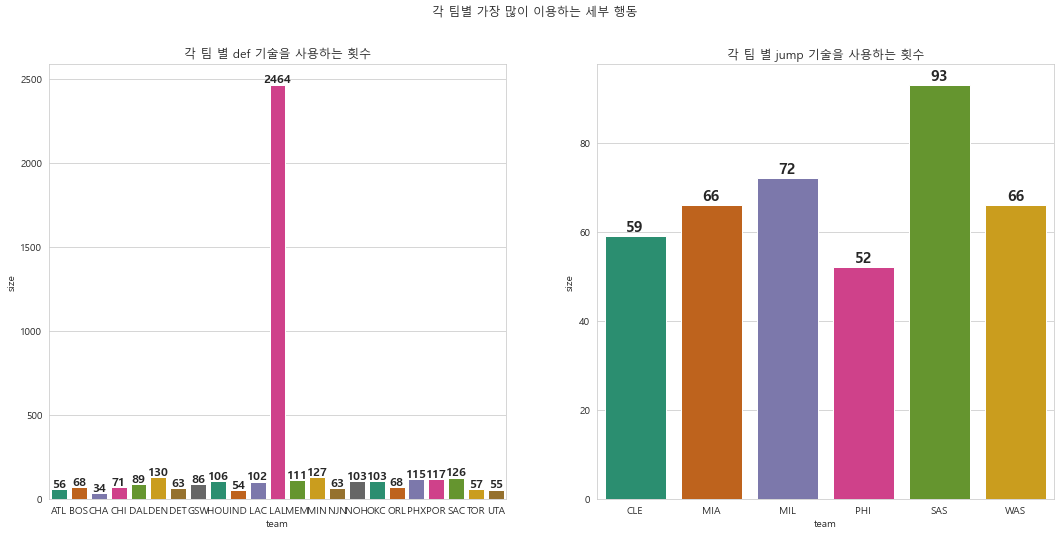

In [187]:
fig, ax=plt.subplots(1,2, figsize=(18,8))
ax=ax.flatten()

_=sns.barplot(data=df_def, x="team", y="size", ax=ax[0], palette="Dark2")
_=ax[0].set_title("각 팀 별 def 기술을 사용하는 횟수")

position=0
for ii in df_def["size"]:
    # print(ii)
    ax[0].text(s=ii, ha="center", va="center", x=position, y=ii+30, fontdict={"fontsize":12, "fontweight":"bold"})
    position+=1
    
_=sns.barplot(data=df_jump, x="team", y="size", ax=ax[1], palette="Dark2")
_=ax[1].set_title("각 팀 별 jump 기술을 사용하는 횟수")

position=0
for ii in df_jump["size"]:
    # print(ii)
    ax[1].text(s=ii, ha="center", va="center", x=position, y=ii+2, fontdict={"fontsize":15, "fontweight":"bold"})
    position+=1
    
_=plt.suptitle("각 팀별 가장 많이 이용하는 세부 행동")   
plt.savefig("./../images_Lakers/팀 별 types.png", dpi=200, facecolor="#F6F7FB")

### ∴ 대부분의 팀들이 def를 많이 이용하고, 6개 팀만 jump를 많이 이용한다. LA Lakers 팀은 압도적으로 def 기술을 많이 이용하고 있고, 승리도 많이 하고 있다. def 기술과 승리는 관련성이 있음을 알 수 있다.

In [205]:
df_made=df_copy.loc[df_copy["result"].isin(["made"]), :]
df_made=df_made[["date", "team", "points"]].groupby(["date", "team"])["points"].sum().reset_index()

df_lal=df_made.loc[df_made["team"]=="LAL", :]
df_opp=df_made.loc[df_made["team"]!="LAL", :]

In [206]:
df_lal

,date,team,points
0,2008-10-28,LAL,96
3,2008-10-29,LAL,117
5,2008-11-01,LAL,104
7,2008-11-05,LAL,106
9,2008-11-09,LAL,111
...,...,...,...
146,2009-04-07,LAL,122
149,2009-04-09,LAL,116
150,2009-04-10,LAL,98
152,2009-04-12,LAL,92


In [207]:
df_opp

,date,team,points
1,2008-10-28,POR,76
2,2008-10-29,LAC,79
4,2008-11-01,DEN,97
6,2008-11-05,LAC,88
8,2008-11-09,HOU,82
...,...,...,...
147,2009-04-07,SAC,104
148,2009-04-09,DEN,102
151,2009-04-10,POR,106
153,2009-04-12,MEM,75


In [210]:
df_merged=pd.merge(df_lal, df_opp, on="date")
df_merged
df_merged.loc[df_merged["points_x"]<df_merged["points_y"], "team_y"].value_counts()

ORL    2
POR    2
DET    1
IND    1
SAC    1
MIA    1
NOH    1
SAS    1
DEN    1
PHX    1
PHI    1
ATL    1
CHA    1
Name: team_y, dtype: int64

### LA Lakers 팀을 많이 이긴 opp 팀을 알아보니, 총 2회로 ORL과 POR 팀이었다. 2개의 팀 모두 def 기술을 가장 많이 이용하는 팀이다. 고로, def 기술을 잘 활용하면 승기를 잡을 수 있음을 증명할 수 있다.

In [214]:
df_type_pivot=pd.pivot_table(data=df_type_count, index="team", columns="type", values="size").T
df_type_pivot

team,ATL,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
type,,,,,,,,,,,,,,,,,,,,,
3pt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
def,56.0,68.0,34.0,71.0,NaN,89.0,130.0,63.0,86.0,106.0,...,103.0,68.0,NaN,115.0,117.0,126.0,NaN,57.0,55.0,NaN
jump,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,52.0,NaN,NaN,NaN,93.0,NaN,NaN,66.0
official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
plt.rcParams["font.family"]='Malgun Gothic' # 한글 깨짐 방지

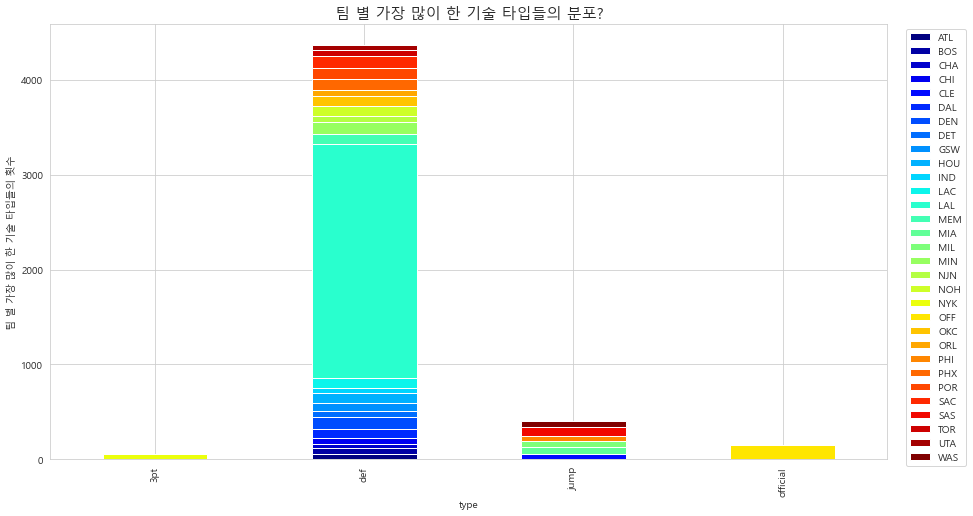

In [229]:
fig, ax=plt.subplots(1, 1, figsize=(15,8))
_=df_type_pivot.plot.bar(ax=ax, stacked=True, cmap="jet")
_=ax.set_ylabel("팀 별 가장 많이 한 기술 타입들의 횟수")
_=plt.legend(bbox_to_anchor=(1.1,1))
_=plt.title("팀 별 가장 많이 한 기술 타입들의 분포?", fontsize=15)

fig.savefig("./../images_Lakers/팀 별 가장 많이 한 기술 타입들의 분포.png", dpi=200, facecolor="#F6F7FB")

### ∴ 전반적으로 def 기술이 가장 많게 분포되어 있다. 그리고 def 기술을 LA Lakers 팀이 가장 많이 이용한다. 그 다음은 jump이고, OFF 팀은 official을 가장 많이 이용하고, NYK 팀은 3pt를 가장 많이 이용한다.

## 4-7. period 별 type 분포?

In [232]:
df3=df_copy.groupby(["period", "type"]).size().reset_index()
df3.columns=["period", "type", "count"]
df3.sort_values(by=["period", "count"], ascending=[True, False], inplace=True)
df3

,period,type,count
4,1,def,1257
26,1,jump,1215
0,1,3pt,707
32,1,layup,506
34,1,off,472
...,...,...,...
264,5,turnaround jump,2
255,5,jump hook,1
256,5,layup,1
260,5,running dunk,1


In [233]:
df3=pd.pivot_table(data=df3, index="type", columns="period", values="count")
df3

period,1,2,3,4,5
type,,,,,
3pt,707.0,722.0,772.0,844.0,9.0
alley oop dunk,29.0,20.0,22.0,26.0,NaN
alley oop layup,23.0,15.0,7.0,15.0,NaN
away from play,NaN,NaN,3.0,NaN,NaN
clear path,1.0,NaN,2.0,1.0,NaN
...,...,...,...,...,...
turnaround bank,9.0,8.0,9.0,1.0,NaN
turnaround bank hook,2.0,1.0,1.0,NaN,NaN
turnaround fade away,22.0,16.0,9.0,17.0,NaN


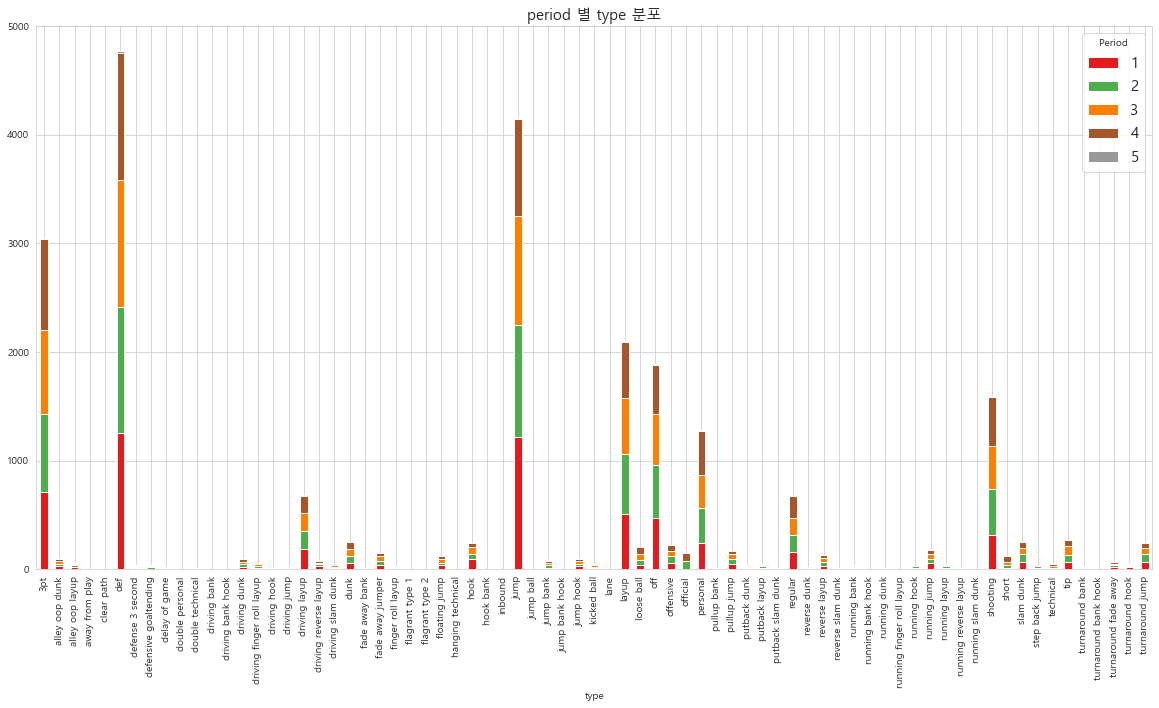

In [237]:
fig, ax=plt.subplots(1, 1, figsize=(20,10))
_=df3.plot.bar(stacked=True, ax=ax, cmap="Set1")
_=plt.legend(fontsize=15, title="Period")
_=plt.title("period 별 type 분포", fontsize=15)

_=plt.savefig("./../images_Lakers/period 별 type 분포.png", dpi=200, facecolor="#F6F7FB")

### ∴ 전체적으로 많이 이용한 세부 기술을 알아 보니, 각 period 별로는 세부 기술의 분포와는 관련 없다. 

# 5. Review

* 총 데이터의 개수 :  450112
* 결측치의 개수 : 76625, 전체 데이터의 17.02%를 차지한다.
* LAL와 경기한 상대편 팀의 개수 :  29
* LAL의 행동 개수 :  10
* LAL의 세부 행동 개수 :  73

* 홈 경기와 원정 경기의 비율 = 1 : 1
* 경기에서 선수들이 가장 많이 한 기술은 shot이 가장 많고, jump ball과 violation이 가장 적은 편이다. 그리고 period와 기술 간의 관계는 거의 없다.
* LA Lakers 팀이 LAL가 아닌 팀 보다 승리한 횟수가 패배한 횟수보다 훨씬 많다.
* 골대 근처로 슛이 많이 들어가기 때문에, 그 쪽에 분포가 많이 쏠려있다. 그리고 points가 클 수록 멀리 던진 슛을 의미하고, 그 슛들의 분포도 알 수 있었다. 또한 ype의 상위 10개의 분포를 알아보았다. jump가 가장 많았고, 멀리서는 (3점 슛을 던지는 기술인 것 같다.) 3pt가 많았다. 골대 근처에서는 shooting, driving layup, lay up, hook 등을 이용하였다.
* 모든 팀 (LA Lakers와 LAL가 아닌 팀)이 가장 많이 이용한 기술은 shot 이다. 날짜 별로 비교했을 때, 항상 shot가 free throw 보다 많았다. LAL 팀은 2009-02-26에 가장 많이 shot를 이용하고, OPP 팀은 2009-02-18에 가장 많이 shot를 이용하였다.
* 대부분의 팀들이 def를 많이 이용하고, 6개 팀만 jump를 많이 이용한다. LA Lakers 팀은 압도적으로 def 기술을 많이 이용하고 있고, 승리도 많이 하고 있다. def 기술과 승리는 관련성이 있음을 알 수 있다.
* 상위 10개의 데이터를 살펴 보면, 전체적으로 기술을 가장 많이 사용한 팀은 LA LAkers이고, def를 가장 많이 이용하였고, turnaround jump를 가장 적게 사용하였다.
* 팀 별로 많이 이용한 세부 기술을 알아 보니, 전반적으로 def 기술이 가장 많게 분포되어 있다. 각 팀들이 많이 사용하는 기술이다.
* 전체적으로 많이 이용한 세부 기술을 알아 보니, 각 period 별로는 세부 기술의 분포와는 관련 없다. 